In [66]:
import numpy as np
import numpy.random as nrd
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.decomposition import NMF, PCA

# Exercise 14.25

Fit a non-negative matrix factorization model to the collection
of two’s in the digits database. Use 25 basis elements, and compare with a
24- component (plus mean) PCA model. In both cases display the W and
H matrices as in Figure 14.33.

# Solution

Let's first load the dataset,

In [29]:
url_link = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.digits/train.2'
df = pd.read_csv(url_link,header=None)

df.tail()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
726,-1.0,-1.0,-1.0,-1.0,-0.991,-0.694,-0.768,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.0,-1.0,-0.898,-0.694,-0.982,-1.0,-1.0
727,-1.0,-1.0,-1.0,-1.0,-0.867,-0.647,0.393,0.883,0.235,-0.723,...,-0.851,-1.000,-1.000,-1.0,-1.0,-0.642,0.615,-0.337,-1.0,-1.0
728,-1.0,-1.0,-1.0,-1.0,-0.112,0.893,-0.042,-0.979,-1.000,-1.000,...,-0.280,-1.000,-1.000,-1.0,-1.0,-1.000,-1.000,-1.000,-1.0,-1.0
729,-1.0,-1.0,-1.0,-1.0,-0.750,-0.066,0.529,0.357,-0.734,-1.000,...,0.599,0.387,-0.645,-1.0,-1.0,-1.000,-1.000,-1.000,-1.0,-1.0
730,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.000,-1.000,-1.0,-1.0


Notice that some of the entries are negative, and we need a non-negative matrix to use the suggested method. Let's shift the dataset by the minimum value in each column,

In [30]:
df -= df.min()
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
726,0.0,0.0,0.0,0.0,0.009,0.306,0.232,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.102,0.306,0.018,0.0,0.0
727,0.0,0.0,0.0,0.0,0.133,0.353,1.393,1.883,1.235,0.277,...,0.149,0.000,0.000,0.0,0.0,0.358,1.615,0.663,0.0,0.0
728,0.0,0.0,0.0,0.0,0.888,1.893,0.958,0.021,0.000,0.000,...,0.720,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.0
729,0.0,0.0,0.0,0.0,0.250,0.934,1.529,1.357,0.266,0.000,...,1.599,1.387,0.355,0.0,0.0,0.000,0.000,0.000,0.0,0.0
730,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.0


In [45]:
X = df.to_numpy()

N,p = X.shape

And we visualize some of the observations, to get an idea of how the images look like,

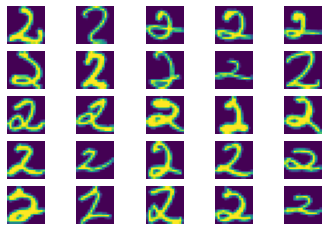

In [32]:
# This one is useful for mapping the vector into a matrix
def vector_to_matrix(x):
    N = int(np.sqrt(x.size))
    return x.reshape((N,N))

# Here we plot the first 25 observations
n = 5

for i in range(n**2):
    plt.subplot(n,n,i+1)
    plt.axis('off')
    plt.imshow(vector_to_matrix(X[i]))

plt.show()

We will make use of this function to visualize how NMF and PCA make different kind of components,

In [74]:
def visualize_components(X,H,W):
    
    N,_ = X.shape
    
    # Let select a random observation in the dataset
    index = nrd.choice(N)

    # And visualize it,
    plt.subplot(1,2,1)
    plt.imshow(vector_to_matrix(X[index]))
    plt.title('Original image')
    plt.axis('off')

    # together with the reconstructed one,
    plt.subplot(1,2,2)
    plt.imshow(vector_to_matrix(W[index]@H))
    plt.title('Reconstructed image')
    plt.axis('off')

    plt.show()

    # Let's visualize the feature images
    print('--- NMF ---')
    n = int(np.sqrt(R))

    # features plot
    for i,h in enumerate(H):
        plt.subplot(n,n,i+1)
        plt.axis('off')
        plt.imshow(vector_to_matrix(h))

    plt.suptitle('Features')
    plt.show()

    # Weight for this instance plot
    plt.imshow(vector_to_matrix(W[index]))
    plt.title('Weight for image')
    plt.axis('off')
    plt.colorbar()
    plt.show()

### Non-negative matrix factorization

Let's use the algorithm provided by sci-learn,

In [75]:
# Number of "basis vectors" we want to obtain from the factorization
R = 25

# We apply the model,
model = NMF(n_components=R,init='nndsvd',max_iter=1000)
W = model.fit_transform(X)
H = model.components_

Let's visualize the factors in H as images, and the weight W for a randomly picked observation,

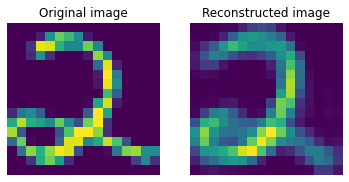

--- NMF ---


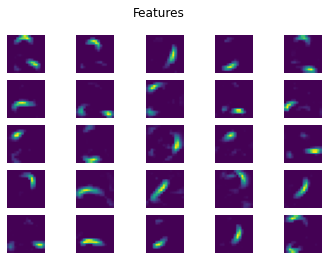

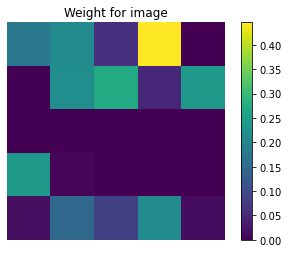

In [76]:
visualize_components(X,H,W)

We see how the NMF create features vectors (images) that capture a specific part of the image.

### Principal component analysis

Let's use the algorithm provided by sci-learn even in this case,

In [78]:
# We apply the PCA model, where the first component is the mean
model = PCA(n_components=R-1)

W = np.hstack((np.ones((N,1)),model.fit_transform(X)))
H = np.vstack(([model.mean_],model.components_))

Let's visualize the components for PCA,

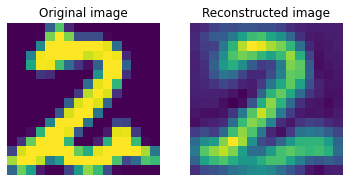

--- NMF ---


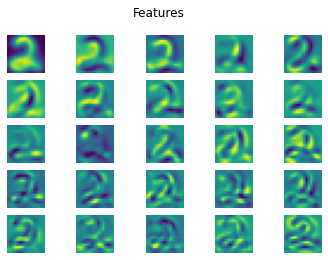

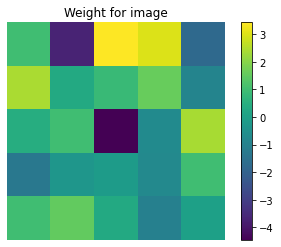

In [79]:
visualize_components(X,H,W)

As expected, the basis images for PCA are global, unlike the ones for NMF.